<a href="https://colab.research.google.com/github/abhiraj-anand/machine-learning-deep-learning/blob/main/Iris_using_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Machine Learning Project
## Iris flower dataset classification using Neural network


# Load dataset

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### a. Input data = Iris dataset

In [32]:
#Importing the dataset, df stands for dataframe
url = 'https://raw.githubusercontent.com/abhiraj-anand/machine-learning-deep-learning/main/Iris/Iris.csv'
iris_df = pd.read_csv(url)

In [33]:
#get dummies is used to converts categorical data into dummy or indicator variables.
iris_df = pd.get_dummies(iris_df, columns=['Species'])
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


One-hot labels by get_dummies() method

In [34]:
#X are the inputs and y are the labels/output
X = iris_df.values[:, 1:5]
y = iris_df.values[:, 5:8]

In [35]:
#Normalize input data to get on a same scale between 0 and 1
def normalize(array):
    arr_min = array.min(axis=(0, 1))
    arr_max = array.max(axis=(0, 1))
    return (array - arr_min) / (arr_max - arr_min)

In [36]:
X = normalize(X)

In [37]:
#Split dataset into train and test set, test is equal to 10% of the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [38]:
!pip install keras

# Build NN with Keras

In [39]:
from keras.models import Sequential 
from keras.layers import Dense 
from tensorflow.keras.optimizers import SGD #Stochastic gradient descent

### b. Number of hidden layers = 1
### c.  Number of units in hidden layer = 10
### e. Learning algorithm = stochastic gradient descent
### f. Activation = logistic/sigmoid

In [40]:
#Defining the model  LR 0.0001
def create_network_LR1():
    model = Sequential()
    model.add(Dense(7, input_shape=(4,), activation='sigmoid')) #Input layer, input 4 values -> output 7 values using sigmoid
    model.add(Dense(10, activation='sigmoid')) #Hidden layer, input 7 values (output of first layer) -> output 10 values using sigmoid
    model.add(Dense(3, activation='softmax')) #Output layer, input 8 values -> output 3 values (3 are the classes) using softmax
        
        #Layers are fully connected that means output of one layer is fully connected to the each node of next layer
          
    model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.0001), metrics=['accuracy']) #categorical_crossentropy Computes the crossentropy loss between the labels and predictions. Using the optimizer SGD.
    return model

In [41]:
model_LR1 = create_network_LR1()  # LR 0.0001

### d. Number of iterations = 5000

In [42]:
#Training the model, by providing input values, output labels, number of epochs, batch size define how much data should be picked up in one iteration, and defining the test data as the validation data
import time

Elapsed_time = []
X_test = np.asarray(X_test).astype('float32')

Start_time = time.time()
results_LR1 = model_LR1.fit(X_train,y_train, epochs=5000, batch_size=8,verbose=1, validation_data=(X_test, y_test))  # LR 0.0001
End_time = time.time()

Elapsed_time.append(End_time-Start_time)


Streaming output truncated to the last 5000 lines.
17/17 [==============================] - 0s 5ms/step - loss: 1.0961 - accuracy: 0.3481 - val_loss: 1.1064 - val_accuracy: 0.2000
Epoch 2502/5000
17/17 [==============================] - 0s 5ms/step - loss: 1.0961 - accuracy: 0.3481 - val_loss: 1.1064 - val_accuracy: 0.2000
Epoch 2503/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0961 - accuracy: 0.3481 - val_loss: 1.1064 - val_accuracy: 0.2000
Epoch 2504/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0961 - accuracy: 0.3481 - val_loss: 1.1064 - val_accuracy: 0.2000
Epoch 2505/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0962 - accuracy: 0.3481 - val_loss: 1.1064 - val_accuracy: 0.2000
Epoch 2506/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0961 - accuracy: 0.3481 - val_loss: 1.1064 - val_accuracy: 0.2000
Epoch 2507/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0962 - accuracy:

In [43]:
#Defining the model  LR 0.001
def create_network_LR2():
    model = Sequential()
    model.add(Dense(7, input_shape=(4,), activation='sigmoid')) #Input layer, input 4 values -> output 7 values using relu
    model.add(Dense(10, activation='sigmoid')) #Hidden layer, input 7 values (output of first layer) -> output 8 values using relu
    model.add(Dense(3, activation='softmax')) #Output layer, input 8 values -> output 3 values (3 are the classes) using softmax
        
        #Layers are fully connected that means output of one layer is fully connected to the each node of next layer
        
    #opt = keras.optimizers.SGD(learning_rate=0.001)    
    model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.001), metrics=['accuracy']) #categorical_crossentropy Computes the crossentropy loss between the labels and predictions. Using the optimizer Adam.
    return model

In [44]:
model_LR2 = create_network_LR2()  # LR 0.001

In [45]:
Start_time = time.time()
results_LR2 = model_LR2.fit(X_train,y_train, epochs=5000, batch_size=8, validation_data=(X_test, y_test)) # LR 0.001

End_time = time.time()

Elapsed_time.append(End_time-Start_time)

Streaming output truncated to the last 5000 lines.
17/17 [==============================] - 0s 4ms/step - loss: 1.0887 - accuracy: 0.3481 - val_loss: 1.0989 - val_accuracy: 0.2000
Epoch 2502/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0887 - accuracy: 0.3481 - val_loss: 1.0989 - val_accuracy: 0.2000
Epoch 2503/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0886 - accuracy: 0.3481 - val_loss: 1.0989 - val_accuracy: 0.2000
Epoch 2504/5000
17/17 [==============================] - 0s 5ms/step - loss: 1.0887 - accuracy: 0.3481 - val_loss: 1.0989 - val_accuracy: 0.2000
Epoch 2505/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0887 - accuracy: 0.3481 - val_loss: 1.0989 - val_accuracy: 0.2000
Epoch 2506/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0886 - accuracy: 0.3481 - val_loss: 1.0989 - val_accuracy: 0.2000
Epoch 2507/5000
17/17 [==============================] - 0s 4ms/step - loss: 1.0886 - accuracy:

In [46]:
#Defining the model  LR 0.01
def create_network_LR3():
    model = Sequential()
    model.add(Dense(7, input_shape=(4,), activation='sigmoid')) #Input layer, input 4 values -> output 7 values using logistic
    model.add(Dense(10, activation='sigmoid')) #Hidden layer, input 7 values (output of first layer) -> output 10 values using logistic
    model.add(Dense(3, activation='softmax')) #Output layer, input 8 values -> output 3 values (3 are the classes) using softmax
        
        #Layers are fully connected that means output of one layer is fully connected to the each node of next layer
        
    #opt = keras.optimizers.SGD(learning_rate=0.001)    
    model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy']) #categorical_crossentropy Computes the crossentropy loss between the labels and predictions. Using the optimizer SGD.
    return model

In [47]:
model_LR3 = create_network_LR3()  # LR 0.01

In [48]:
Start_time = time.time()

results_LR3 = model_LR3.fit(X_train,y_train, epochs=5000, batch_size=8, validation_data=(X_test, y_test))  # LR 0.01

End_time = time.time()

Elapsed_time.append(End_time-Start_time)

Streaming output truncated to the last 5000 lines.
17/17 [==============================] - 0s 4ms/step - loss: 0.1041 - accuracy: 0.9704 - val_loss: 0.1010 - val_accuracy: 1.0000
Epoch 2502/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.1038 - accuracy: 0.9630 - val_loss: 0.1015 - val_accuracy: 1.0000
Epoch 2503/5000
17/17 [==============================] - 0s 7ms/step - loss: 0.1036 - accuracy: 0.9704 - val_loss: 0.1010 - val_accuracy: 1.0000
Epoch 2504/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.1039 - accuracy: 0.9630 - val_loss: 0.1003 - val_accuracy: 1.0000
Epoch 2505/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.1031 - accuracy: 0.9704 - val_loss: 0.1002 - val_accuracy: 1.0000
Epoch 2506/5000
17/17 [==============================] - 0s 5ms/step - loss: 0.1041 - accuracy: 0.9704 - val_loss: 0.0993 - val_accuracy: 1.0000
Epoch 2507/5000
17/17 [==============================] - 0s 7ms/step - loss: 0.1037 - accuracy:

In [49]:
#Defining the model  LR 0.1
def create_network_LR4():
    model = Sequential()
    model.add(Dense(7, input_shape=(4,), activation='sigmoid')) #Input layer, input 4 values -> output 7 values using relu
    model.add(Dense(10, activation='sigmoid')) #Hidden layer, input 7 values (output of first layer) -> output 10 values using relu
    model.add(Dense(3, activation='softmax')) #Output layer, input 8 values -> output 3 values (3 are the classes) using softmax
        
        #Layers are fully connected that means output of one layer is fully connected to the each node of next layer
        
    #opt = keras.optimizers.SGD(learning_rate=0.001)    
    model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1), metrics=['accuracy']) #categorical_crossentropy Computes the crossentropy loss between the labels and predictions. Using the optimizer SGD.
    return model

In [50]:
model_LR4 = create_network_LR4()  # LR 0.1

In [51]:
Start_time = time.time()

results_LR4 = model_LR4.fit(X_train,y_train, epochs=5000, batch_size=8, validation_data=(X_test, y_test))  # LR 0.01

End_time = time.time()

Elapsed_time.append(End_time-Start_time)

Streaming output truncated to the last 5000 lines.
17/17 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 0.9630 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 2502/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0610 - accuracy: 0.9630 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 2503/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0576 - accuracy: 0.9778 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 2504/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0630 - accuracy: 0.9630 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 2505/5000
17/17 [==============================] - 0s 5ms/step - loss: 0.0633 - accuracy: 0.9630 - val_loss: 0.0248 - val_accuracy: 1.0000
Epoch 2506/5000
17/17 [==============================] - 0s 6ms/step - loss: 0.0560 - accuracy: 0.9630 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 2507/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0598 - accuracy:

In [52]:
#Defining the model  LR 1
def create_network_LR5():
    model = Sequential()
    model.add(Dense(7, input_shape=(4,), activation='sigmoid')) #Input layer, input 4 values -> output 7 values using relu
    model.add(Dense(10, activation='sigmoid')) #Hidden layer, input 7 values (output of first layer) -> output 8 values using relu
    model.add(Dense(3, activation='softmax')) #Output layer, input 8 values -> output 3 values (3 are the classes) using softmax
        
        #Layers are fully connected that means output of one layer is fully connected to the each node of next layer
        
    #opt = keras.optimizers.SGD(learning_rate=0.001)    
    model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=1), metrics=['accuracy']) #categorical_crossentropy Computes the crossentropy loss between the labels and predictions. Using the optimizer Adam.
    return model

In [53]:
model_LR5 = create_network_LR5()  # LR 1

In [54]:
Start_time = time.time()

results_LR5 = model_LR5.fit(X_train,y_train, epochs=5000, batch_size=8, validation_data=(X_test, y_test))  # LR 1

End_time = time.time()

Elapsed_time.append(End_time-Start_time)

Streaming output truncated to the last 5000 lines.
17/17 [==============================] - 0s 4ms/step - loss: 0.0582 - accuracy: 0.9778 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 2502/5000
17/17 [==============================] - 0s 5ms/step - loss: 0.0544 - accuracy: 0.9778 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 2503/5000
17/17 [==============================] - 0s 6ms/step - loss: 0.0475 - accuracy: 0.9778 - val_loss: 0.0368 - val_accuracy: 1.0000
Epoch 2504/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0682 - accuracy: 0.9704 - val_loss: 0.0303 - val_accuracy: 1.0000
Epoch 2505/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0885 - accuracy: 0.9704 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 2506/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0822 - accuracy: 0.9778 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 2507/5000
17/17 [==============================] - 0s 4ms/step - loss: 0.0773 - accuracy:

## 2. Plot the loss curve for each learning rate.

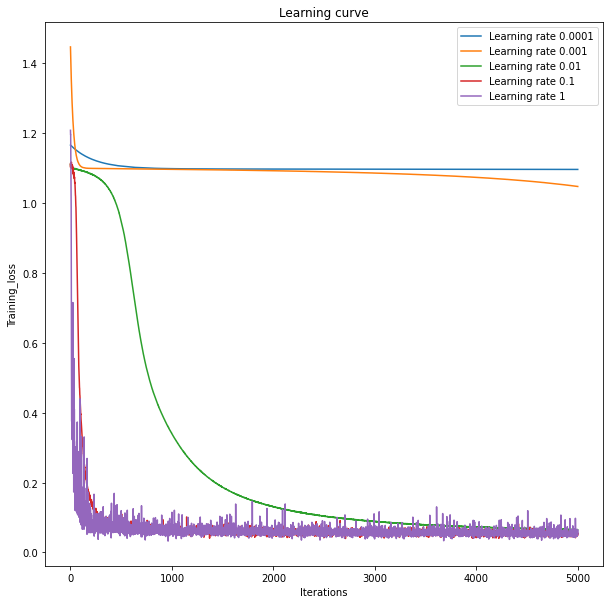

In [55]:
#Plotting the loss of training data and validation data
plt.figure(figsize=(10, 10))
plt.title("Learning curve")
plt.plot(results_LR1.history["loss"], label="Learning rate 0.0001")
plt.plot(results_LR2.history["loss"], label="Learning rate 0.001")
plt.plot(results_LR3.history["loss"], label="Learning rate 0.01")
plt.plot(results_LR4.history["loss"], label="Learning rate 0.1")
plt.plot(results_LR5.history["loss"], label="Learning rate 1")

plt.xlabel("Iterations")
plt.ylabel("Training_loss")
plt.legend();

### Generating training scores for each learning rate

In [56]:
Training_score=[0]
results1 = model_LR1.evaluate(X_test, y_test, batch_size=128)
for i in results1:
    Training_score[0] = i

1/1 [==============================] - 0s 27ms/step - loss: 1.1055 - accuracy: 0.2000


In [57]:
results2 = model_LR2.evaluate(X_test, y_test, batch_size=128)
flag = True
for i in results2:
    if (flag==False):
        Training_score.append(i) 
    flag=False

1/1 [==============================] - 0s 24ms/step - loss: 1.0578 - accuracy: 0.6000


In [58]:
results3 = model_LR3.evaluate(X_test, y_test, batch_size=128)
flag = True
for i in results3:
    if (flag==False):
        Training_score.append(i) 
    flag=False

1/1 [==============================] - 0s 29ms/step - loss: 0.0432 - accuracy: 1.0000


In [59]:
results4 = model_LR4.evaluate(X_test, y_test, batch_size=128)
flag = True
for i in results4:
    if (flag==False):
        Training_score.append(i) 
    flag=False

1/1 [==============================] - 0s 24ms/step - loss: 0.0112 - accuracy: 1.0000


In [60]:
results5 = model_LR5.evaluate(X_test, y_test, batch_size=128)
flag = True
for i in results5:
    if (flag==False):
        Training_score.append(i) 
    flag=False

1/1 [==============================] - 0s 24ms/step - loss: 0.0083 - accuracy: 1.0000


This is results of prediction on 5 samples and the below is real labels

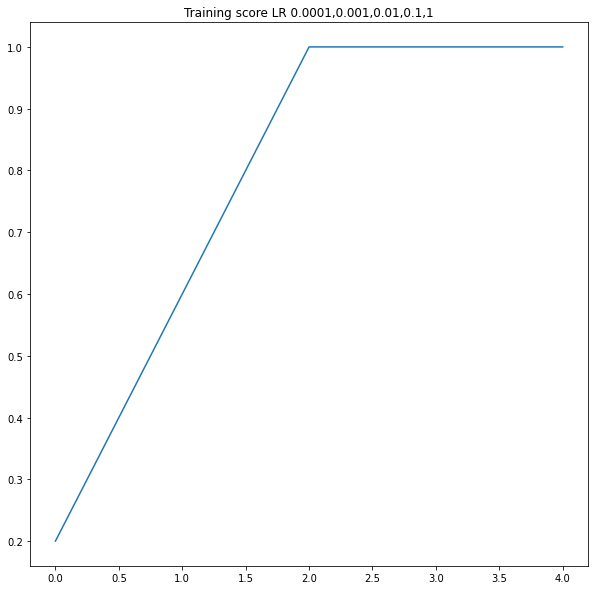

In [61]:
#Plotting the loss of training score
plt.figure(figsize=(10, 10))
plt.title("Training score LR 0.0001,0.001,0.01,0.1,1")
plt.plot(Training_score, label="Training score plot")

## 3. Report execution time for each learning rate as a bar graph. (Use library time and time() method)

In [62]:
from tabulate import tabulate
print(tabulate([['0.0001', Training_score[0],Elapsed_time[0]], ['0.001', Training_score[1],Elapsed_time[1]],['0.01', Training_score[2],Elapsed_time[2]],['0.1', Training_score[3],Elapsed_time[3]],['1', Training_score[4],Elapsed_time[4]]], headers=['Learning rate', 'Training score','Execution time']))

  Learning rate    Training score    Execution time
---------------  ----------------  ----------------
         0.0001               0.2           382.321
         0.001                0.6           442.503
         0.01                 1             442.489
         0.1                  1             390.126
         1                    1             442.485
